In [300]:
import torch
from torch import optim
import seaborn as sns
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import pandas as pd
from torch.utils import data
import ssl
from MaSS import MaSS

sns.set_theme()
torch.manual_seed(0)
ssl._create_default_https_context = ssl._create_unverified_context

In [301]:

def rastrigin(tensor):
    # https://en.wikipedia.org/wiki/Test_functions_for_optimization
    # https://github.com/jettify/pytorch-optimizer/blob/master/examples/viz_optimizers.py

    x, y = tensor
    A = 1
    f = (
        A * 2
        + (x ** 2 - A * torch.cos(x * math.pi * 2))
        + (y ** 2 - A * torch.cos(y * math.pi * 2))
    )
    return f


In [302]:
lr = 0.04
lr1 = 0.01
starting = [[3.],[4.]]

In [303]:
# SGD
p_sgd = torch.tensor(starting, requires_grad=True)
sgd = optim.SGD([p_sgd], lr=lr)
lossSgd = np.empty((2,0))
lossSgd = np.append(lossSgd, p_sgd.data.numpy(),axis=1)

# SGD + Momentum
p_mom = torch.tensor(starting, requires_grad=True)
mom = optim.SGD([p_mom], lr=lr, momentum=0.9)
lossSgdMom = np.empty((2,0))
lossSgdMom = np.append(lossSgdMom, p_mom.data.numpy(),axis=1)

# SGD + nesterov
p_nest = torch.tensor(starting, requires_grad=True)
nest = optim.SGD([p_nest], lr=lr, nesterov=True, momentum=0.9)
lossSgdNest = np.empty((2,0))
lossSgdNest = np.append(lossSgdNest, p_nest.data.numpy(),axis=1)

# Adam
p_adam = torch.tensor(starting, requires_grad=True)
adam = optim.Adam([p_adam], lr=lr)
lossAdam = np.empty((2,0))
lossAdam = np.append(lossAdam, p_adam.data.numpy(),axis=1)

# MaSS
p_mass = torch.tensor(starting, requires_grad=True)
mass = MaSS([p_mass], lr=lr, alpha=0.05, kappa_t=3)
lossMass = np.empty((2,0))
lossMass = np.append(lossMass, p_mass.data.numpy(),axis=1)


In [304]:
# SGD
p_sgd1 = torch.tensor(starting, requires_grad=True)
sgd1 = optim.SGD([p_sgd1], lr=lr1)
lossSgd1 = np.empty((2,0))
lossSgd1 = np.append(lossSgd1, p_sgd1.data.numpy(),axis=1)

# SGD + Momentum
p_mom1 = torch.tensor(starting, requires_grad=True)
mom1 = optim.SGD([p_mom1], lr=lr1, momentum=0.9)
lossSgdMom1 = np.empty((2,0))
lossSgdMom1 = np.append(lossSgdMom1, p_mom1.data.numpy(),axis=1)

# SGD + nesterov
p_nest1 = torch.tensor(starting, requires_grad=True)
nest1 = optim.SGD([p_nest1], lr=lr1, nesterov=True, momentum=0.9)
lossSgdNest1 = np.empty((2,0))
lossSgdNes1 = np.append(lossSgdNest1, p_nest1.data.numpy(),axis=1)

# Adam
p_adam1 = torch.tensor(starting, requires_grad=True)
adam1 = optim.Adam([p_adam1], lr=lr1)
lossAdam1 = np.empty((2,0))
lossAdam1 = np.append(lossAdam1, p_adam1.data.numpy(),axis=1)

# MaSS
p_mass1 = torch.tensor(starting, requires_grad=True)
mass1 = MaSS([p_mass1], lr=lr1, alpha=0.05, kappa_t=3)
lossMass1 = np.empty((2,0))
lossMass1 = np.append(lossMass1, p_mass1.data.numpy(),axis=1)


In [305]:
def Optimiser(p, opt, loss, iterate):

    for i in range(iterate):
        opt.zero_grad()
        output = rastrigin(p)
        output.backward()
        opt.step()
        loss = np.append(loss, p.data.numpy(), axis=1)

    return loss

In [306]:
lossSgd = Optimiser(p_sgd, sgd, lossSgd, 100)
lossSgdMom = Optimiser(p_mom, mom, lossSgdMom, 100)
lossSgdNest = Optimiser(p_nest, nest, lossSgdNest, 100)
lossAdam = Optimiser(p_adam, adam, lossAdam, 100)
lossMass = Optimiser(p_mass, mass, lossMass, 100)


lossSgd1 = Optimiser(p_sgd1, sgd1, lossSgd1, 100)
lossSgdMom1 = Optimiser(p_mom1, mom1, lossSgdMom1, 100)
lossSgdNest1 = Optimiser(p_nest1, nest1, lossSgdNest1, 100)
lossAdam1 = Optimiser(p_adam1, adam1, lossAdam1, 100)
lossMass1 = Optimiser(p_mass1, mass1, lossMass1, 100)



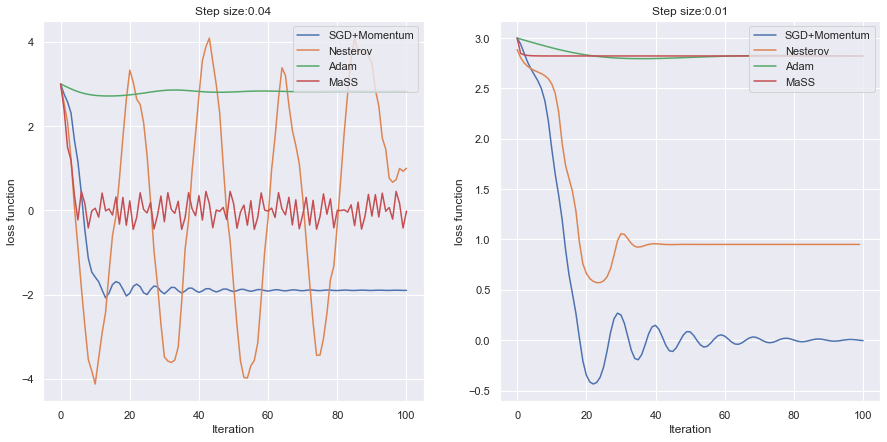

In [307]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].plot(np.arange(0,101,1),lossSgdMom[0], label='SGD+Momentum')
ax[0].plot(np.arange(0,101,1),lossSgdNest[0], label='Nesterov')
ax[0].plot(np.arange(0,101,1),lossAdam[0], label='Adam')
ax[0].plot(np.arange(0,101,1),lossMass[0], label='MaSS')

ax[0].set_title(f'Step size:{lr}')
ax[0].set_xlabel('Iteration')
ax[0].set_ylabel('loss function')
ax[0].legend(loc="upper right")


ax[1].plot(lossSgdMom1[0], label='SGD+Momentum')
ax[1].plot(lossSgdNest1[0], label='Nesterov')
ax[1].plot(lossAdam1[0], label='Adam')
ax[1].plot(lossMass1[0], label='MaSS')

ax[1].set_xlabel('Iteration')
ax[1].set_ylabel('loss function')
ax[1].legend(loc="upper right")
ax[1].set_title(f'Step size:{lr1}')

plt.savefig('Losses.png')

In [308]:
xmin, xmax, xstep = -5.12, 5.12, .2
ymin, ymax, ystep = -5.12, 5.12, .2
x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))
z = rastrigin(torch.tensor([x, y])).numpy()

/var/folders/dr/704qjz3n21lgqk009dttw33w0000gn/T/ipykernel_46927/476253022.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-8" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0].plot(lossSgdMom[0], lossSgdMom[1], '-8', markevery=[-1], label='SGDM', linewidth=2, linestyle='-.')
/var/folders/dr/704qjz3n21lgqk009dttw33w0000gn/T/ipykernel_46927/476253022.py:4: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-8" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0].plot(lossSgdNest[0], lossSgdNest[1], '-8', markevery=[-1],label='Nesterov', linewidth=2, linestyle='-.')
/var/folders/dr/704qjz3n21lgqk009dttw33w0000gn/T/ipykernel_46927/476253022.py:5: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-8" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0].plot(lossAdam[0], los

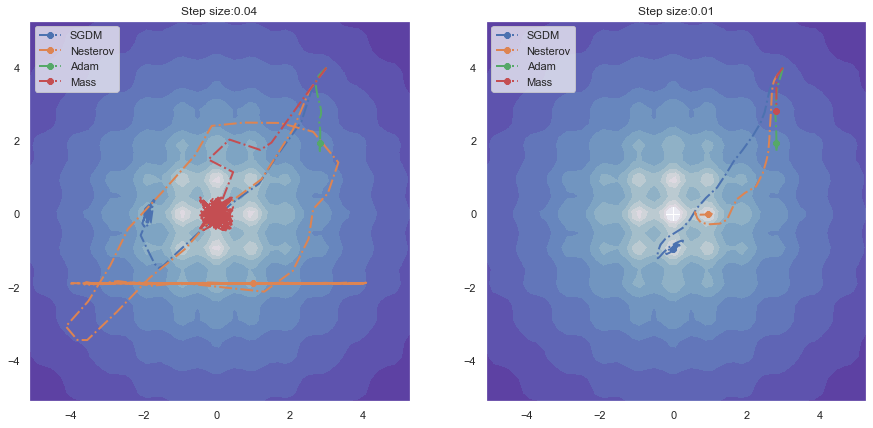

In [309]:
fig, ax = plt.subplots(1,2, figsize=(15, 7))
ax[0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.twilight)
ax[0].plot(lossSgdMom[0], lossSgdMom[1], '-8', markevery=[-1], label='SGDM', linewidth=2, linestyle='-.')
ax[0].plot(lossSgdNest[0], lossSgdNest[1], '-8', markevery=[-1],label='Nesterov', linewidth=2, linestyle='-.')
ax[0].plot(lossAdam[0], lossAdam[1], '-8', markevery=[-1],label='Adam', linewidth=2, linestyle='-.')
ax[0].plot(lossMass[0], lossMass[1], '-8', markevery=[-1],label='Mass', linewidth=2, linestyle='-.')

ax[0].set_title(f'Step size:{lr}')
ax[0].legend()

ax[1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.twilight)
ax[1].plot(lossSgdMom1[0], lossSgdMom1[1], '-8', markevery=[-1], label='SGDM', linewidth=2, linestyle='-.')
ax[1].plot(lossSgdNest1[0], lossSgdNest1[1], '-8', markevery=[-1],label='Nesterov', linewidth=2, linestyle='-.')
ax[1].plot(lossAdam1[0], lossAdam[1], '-8', markevery=[-1],label='Adam', linewidth=2, linestyle='-.')
ax[1].plot(lossMass1[0], lossMass1[1], '-8', markevery=[-1],label='Mass', linewidth=2, linestyle='-.')

ax[1].legend()
ax[1].set_title(f'Step size:{lr1}')

plt.savefig('Rastrigin.png')



/var/folders/dr/704qjz3n21lgqk009dttw33w0000gn/T/ipykernel_46927/668885603.py:3: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-8" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0][0].plot(lossMass[0], lossMass[1], '-8', markevery=[-1], c='tab:orange', label='Mass', linewidth=2, linestyle='-.')
/var/folders/dr/704qjz3n21lgqk009dttw33w0000gn/T/ipykernel_46927/668885603.py:6: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-8" (-> linestyle='-'). The keyword argument will take precedence.
  ax[0][1].plot(lossSgdMom[0], lossSgdMom[1], '-8', markevery=[-1], c='tab:orange', label='SGD+Momentum', linewidth=2, linestyle='-.')
/var/folders/dr/704qjz3n21lgqk009dttw33w0000gn/T/ipykernel_46927/668885603.py:9: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "-8" (-> linestyle='-'). The keyword argument will take prec

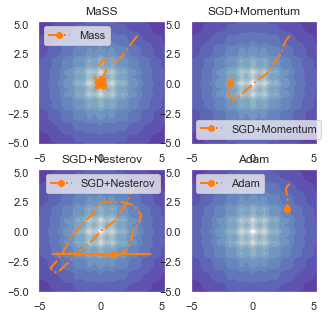

In [310]:

fig, ax = plt.subplots(2, 2, figsize=(5,5))
ax[0][0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.twilight)
ax[0][0].plot(lossMass[0], lossMass[1], '-8', markevery=[-1], c='tab:orange', label='Mass', linewidth=2, linestyle='-.')
ax[0][0].set_title('MaSS')
ax[0][1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.twilight)
ax[0][1].plot(lossSgdMom[0], lossSgdMom[1], '-8', markevery=[-1], c='tab:orange', label='SGD+Momentum', linewidth=2, linestyle='-.')
ax[0][1].set_title('SGD+Momentum')
ax[1][0].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.twilight)
ax[1][0].plot(lossSgdNest[0], lossSgdNest[1], '-8', markevery=[-1], c='tab:orange', label='SGD+Nesterov', linewidth=2, linestyle='-.')
ax[1][0].set_title('SGD+Nesterov')
ax[1][1].contourf(x, y, z, levels=np.logspace(0, 5, 35), norm=LogNorm(), cmap=plt.cm.twilight)
ax[1][1].plot(lossAdam[0], lossAdam[1], '-8', markevery=[-1], c='tab:orange', label='Adam', linewidth=2, linestyle='-.')
ax[1][1].set_title('Adam')

ax[0][0].legend()
ax[0][1].legend()
ax[1][0].legend()
ax[1][1].legend()

